In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df=pd.read_csv("pistachio.csv")
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,Kirmizi_Pistachio
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,Kirmizi_Pistachio
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,Siit_Pistachio
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,Kirmizi_Pistachio


In [3]:
df['Class'].value_counts()


Kirmizi_Pistachio    998
Siit_Pistachio       720
Name: Class, dtype: int64

In [4]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

In [5]:
#FUNCTION OF LABEL ENCODER
#converts categorical column into numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class']=le.fit_transform(df['Class'])

In [6]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,0
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,1
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,0
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,0
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,0
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,0
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,1
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,0


<Axes: >

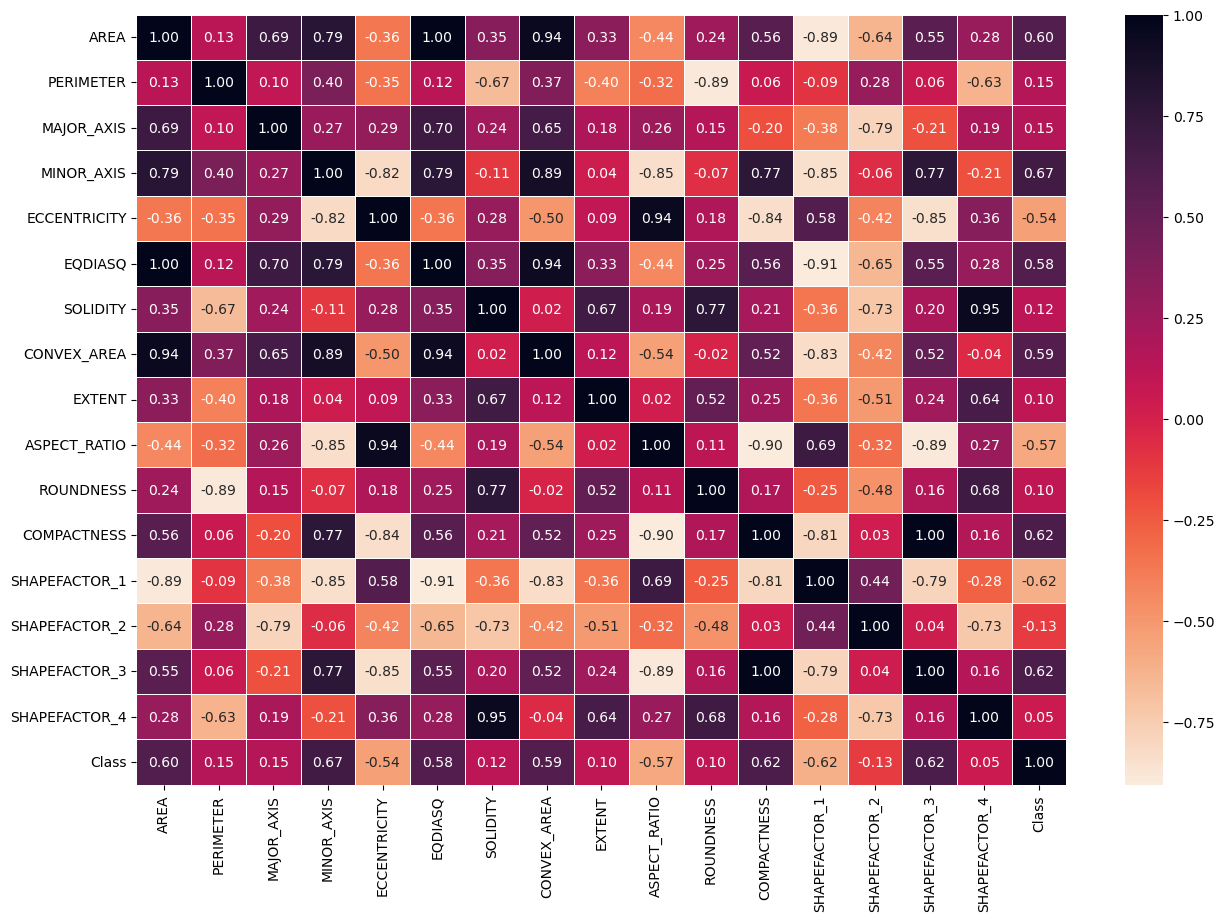

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')

<Axes: xlabel='ROUNDNESS', ylabel='COMPACTNESS'>

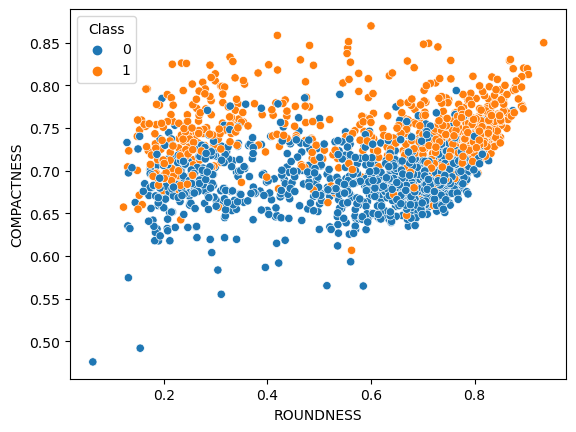

In [8]:
sns.scatterplot(x='ROUNDNESS', y='COMPACTNESS', hue='Class', data=df)

In [6]:

X = df.drop(columns=[ 'Class'],axis=1)
y = df['Class']

In [ ]:
#DECISION TREES
#IT IS A SUPERVISED MACHINE LEARNING ALGORITHM WHICH IS USED FOR CLASSIFICATION PROBLEM.IT IS A TREE STRUCTURED CLASSIFIER 
#WHERE INTERNAL NODES REPRESENT FEATURES OF A DATASET, EACH NODES REPRESENT DECISION RULE.

In [8]:
#standardization is a scaling technique where it makes the data scale free by converting the data into mean 0 and sd 1.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [5]:
hyperparameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}]

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\SI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 5, 10, 20],
                          'min_samples_leaf': [1, 2, 4, 10],
                          'min_samples_split': [2, 5, 10]}],
             scoring='f1', verbose=True)

In [20]:
best_dt_params=grid_search.best_params_
best_dt_params

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [19]:
best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_train, y_train.ravel())
y_pred_dt = best_dt.predict(X_test)
f1 = f1_score(y_test, y_pred_dt)
print("F1 Score on Test Set:", f1)

F1 Score on Test Set: 0.8079470198675497


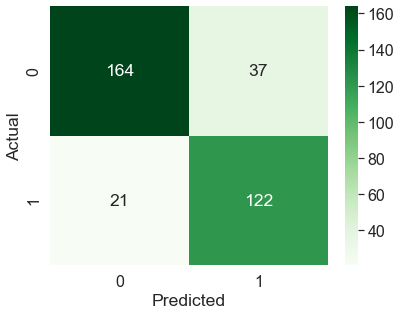

In [21]:
dt_cm = confusion_matrix(y_test, y_pred_dt)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(dt_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_dt))

Accuracy: 0.8313953488372093


In [23]:

hyperparameters = [{
    'n_estimators': range(10,120,10),
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'max_features':[2,3,4]
}]

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 5, 10], 'max_features': [2, 3, 4],
                          'n_estimators': range(10, 120, 10)}],
             scoring='f1', verbose=True)

In [25]:
best_rf_params = grid_search.best_params_
print(best_rf_params)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'n_estimators': 50}


In [26]:
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_train, y_train.ravel())
y_pred_rf = best_rf.predict(X_test)
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score on Test Set:", f1)

F1 Score on Test Set: 0.8442906574394464


In [27]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_rf))

Accuracy: 0.8691860465116279


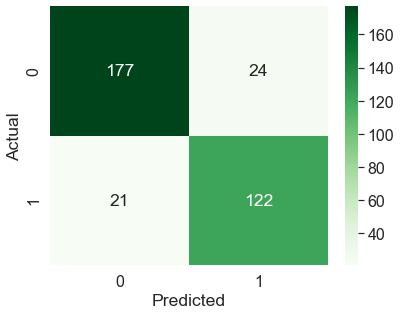

In [28]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [29]:
lr_params = [{'C': [0.1, 1, 10]}]

lr = LogisticRegression()
lr_grid_search = GridSearchCV(lr, lr_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10]}], scoring='f1', verbose=True)

In [32]:
best_lr_params = lr_grid_search.best_params_
print(best_lr_params)
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr)
print("F1 Score on Test Set (Logistic Regression):", f1_lr)

{'C': 0.1}
F1 Score on Test Set (Logistic Regression): 0.8794326241134752


In [33]:
print("Accuracy (Logistic Regression):", metrics.accuracy_score(y_test, y_pred_lr))

Accuracy (Logistic Regression): 0.9011627906976745


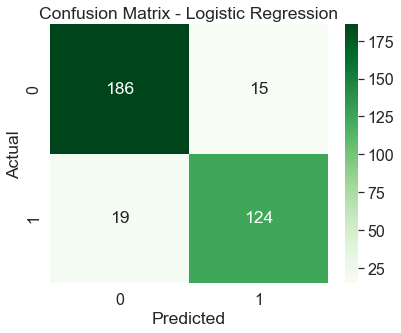

In [34]:
lr_cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(dpi=70)
sns.heatmap(lr_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()